In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os
from pathlib import Path 


In [2]:
cwd = Path.cwd()
data = pd.read_csv("../data/formatted_activity.csv")
df = data

In [3]:
keep_columns = ['Card Member', 'Amount', 'Category']
df2 = df[keep_columns]
df2

,Card Member,Amount,Category
0,ST,26.02,Merchandise & Supplies-Groceries
1,ST,10.00,Restaurant-Bar & Café
2,ST,20.82,Restaurant-Restaurant
3,CT,8.26,Restaurant-Bar & Café
4,CT,7.32,Merchandise & Supplies-Groceries
...,...,...,...
94,CT,7.02,Merchandise & Supplies-Groceries
95,ST,90.00,Merchandise & Supplies-Groceries
96,ST,38.49,Restaurant-Restaurant
97,CT,9.76,Merchandise & Supplies-Groceries


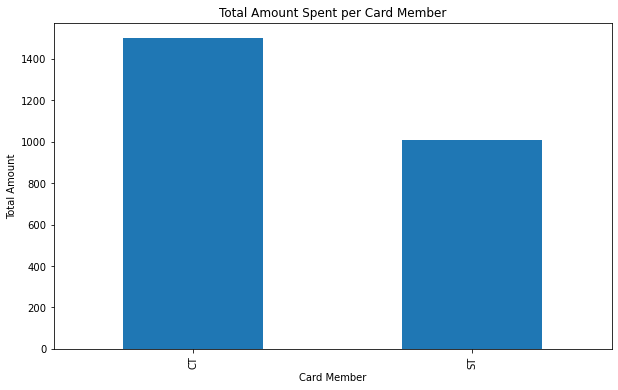

In [4]:
# Bar plot 
plt.figure(figsize=(10, 6))
df.groupby('Card Member')['Amount'].sum().plot(kind='bar')
plt.xlabel('Card Member')
plt.ylabel('Total Amount')
plt.title('Total Amount Spent per Card Member')

plt.show()

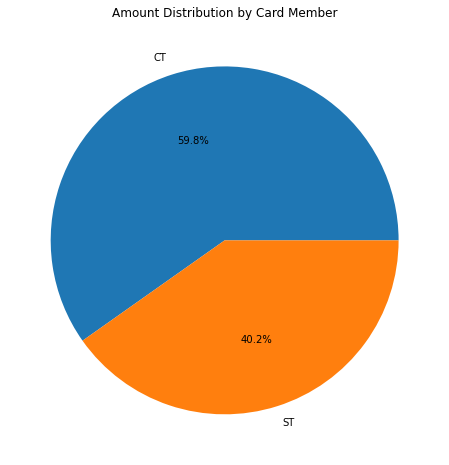

In [5]:
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df = df[df['Amount'] >= 0]  # Filter out negative values

plt.figure(figsize=(8, 8))
amount_by_member = df.groupby('Card Member')['Amount'].sum()
plt.pie(amount_by_member, labels=amount_by_member.index, autopct='%1.1f%%')
plt.title('Amount Distribution by Card Member')
plt.savefig('../plots/pie_amt_cm.png')

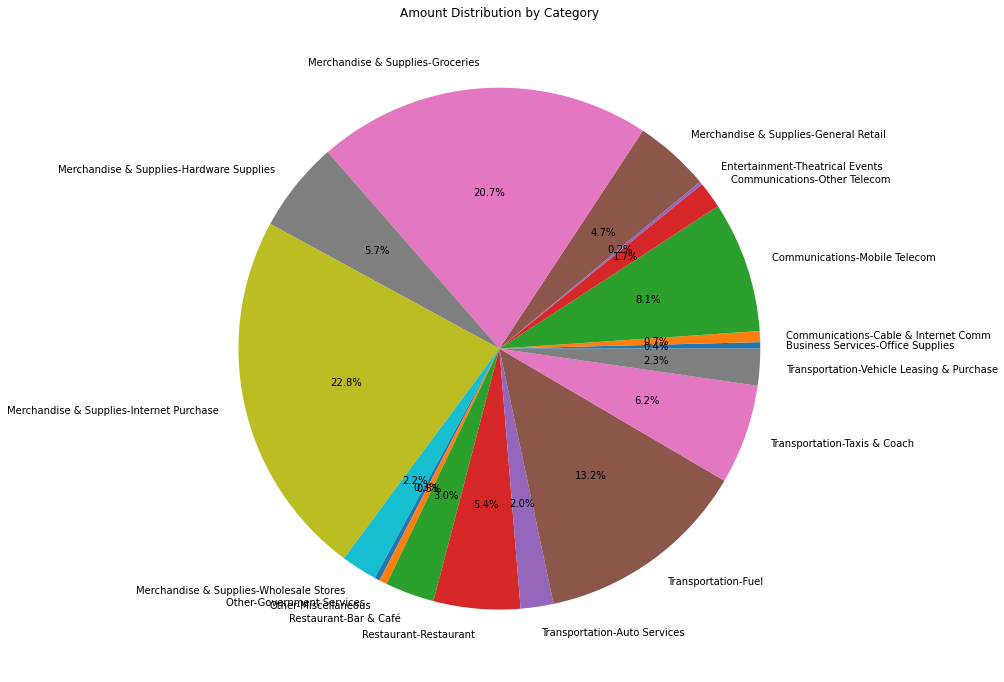

In [6]:
# Pie chart 
plt.figure(figsize=(12, 12))
df.groupby('Category')['Amount'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Amount Distribution by Category')
plt.show()

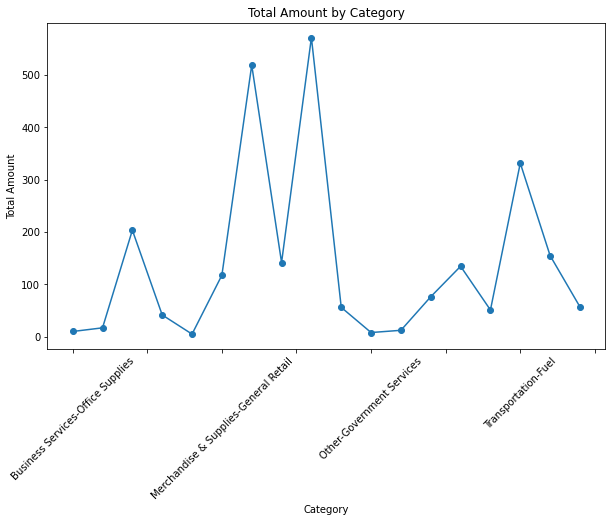

In [7]:
# Line Plot
plt.figure(figsize=(10, 6))
df.groupby('Category')['Amount'].sum().plot(kind='line', marker='o')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.title('Total Amount by Category')
plt.xticks(rotation=45)
plt.show()

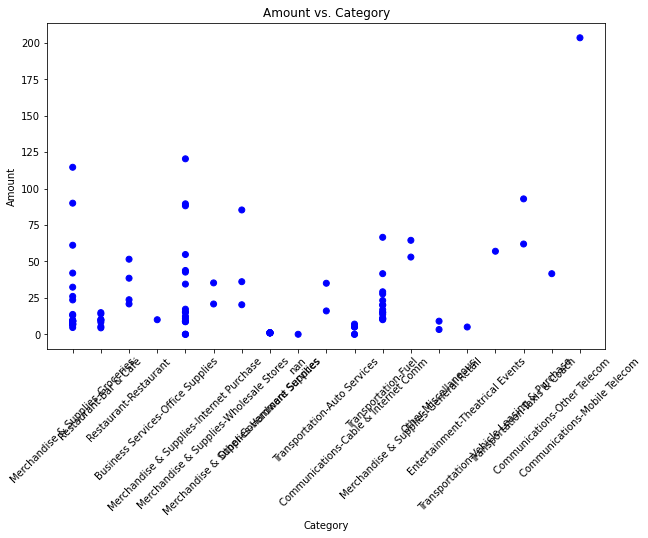

In [15]:

# Assign numeric values to categories
category_values = np.arange(len(df['Category'].unique()))
category_mapping = {category: value for value, category in enumerate(df['Category'].unique())}
df['Category_Num'] = df['Category'].map(category_mapping)

# Assign colors based on 'Card Member' column
colors = np.where(df['Card Member'] == 'Member A', 'red', 'blue')

plt.figure(figsize=(10, 6))
plt.scatter(df['Category_Num'], df['Amount'], c=colors)
plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('Amount vs. Category')
plt.xticks(ticks=category_values, labels=category_mapping.keys(), rotation=45)
plt.show()


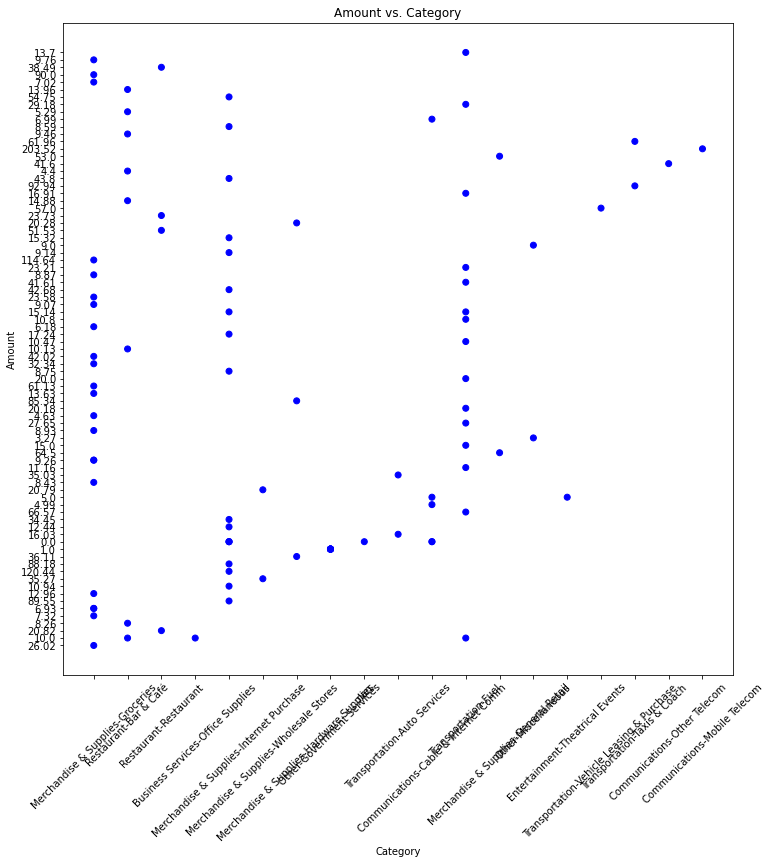

In [14]:
# Scatter Plot
# Convert 'Amount' column to string
df['Amount_Str'] = df['Amount'].astype(str)

# Assign numeric values to categories
category_values = np.arange(len(df['Category'].unique()))
category_mapping = {category: value for value, category in enumerate(df['Category'].unique())}
df['Category_Num'] = df['Category'].map(category_mapping)


# Assign colors based on 'Card Member' column
colors = np.where(df['Card Member'] == 'Member A', 'red', 'blue')


plt.figure(figsize=(12, 12))
plt.scatter(df['Category_Num'], df['Amount_Str'], c=colors)
plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('Amount vs. Category')
plt.xticks(ticks=category_values, labels=category_mapping.keys(), rotation=45)
plt.show()

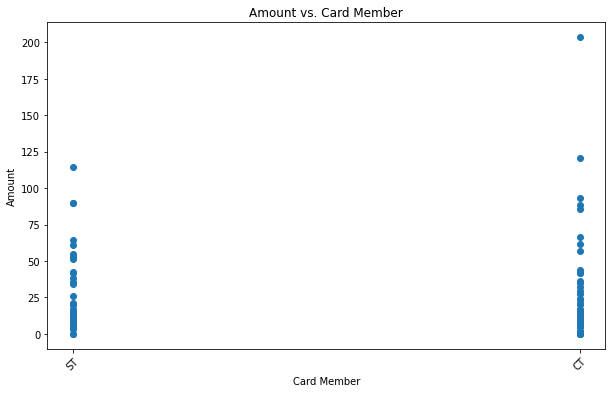

In [10]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Card Member'], df['Amount'])
plt.xlabel('Card Member')
plt.ylabel('Amount')
plt.title('Amount vs. Card Member')
plt.xticks(rotation=45)
plt.show()